In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso

In [2]:
data = pd.read_csv(r'C:\JupyterNotebook\DataSet\Mutual Fund Returns.csv')
data.head()

,Serial Number,total_net_assets,net_annual_expenses_ratio,morningstar_rating,portfolio_cash,portfolio_stocks,portfolio_bonds,portfolio_others,portfolio_preferred,portfolio_convertable,...,category_102,category_103,category_104,category_105,category_106,category_107,investment_0,investment_1,investment_2,bonds_aaa
0,3935,284820000,1.55,3,6.97,14.80,77.25,0.97,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00
1,13836,71810000,1.45,2,10.84,29.59,58.51,0.94,0.01,0.01,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62.54
2,8956,6880000000,0.94,4,0.78,99.22,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00
3,9142,399430000,1.00,2,0.51,99.49,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00
4,5796,656280000,2.69,4,7.78,23.60,68.49,0.11,0.00,0.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00


In [3]:
data.shape

(11898, 153)

In [4]:
data.describe()

,Serial Number,total_net_assets,net_annual_expenses_ratio,morningstar_rating,portfolio_cash,portfolio_stocks,portfolio_bonds,portfolio_others,portfolio_preferred,portfolio_convertable,...,category_102,category_103,category_104,category_105,category_106,category_107,investment_0,investment_1,investment_2,bonds_aaa
count,11898.000000,1.189800e+04,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,...,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000
mean,8886.317196,2.428921e+09,1.019386,2.745503,6.869599,59.288643,30.404463,1.567409,0.368650,0.632453,...,0.001933,0.000252,0.019919,0.011094,0.034712,0.006640,0.469827,0.261809,0.268364,12.442643
std,5130.876028,1.018769e+10,0.615437,1.361566,11.777783,42.114027,38.794591,6.375753,2.435118,5.239956,...,0.043926,0.015878,0.139729,0.104748,0.183056,0.081217,0.499110,0.439638,0.443127,23.614576
min,2.000000,5.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.600000
25%,4414.250000,7.008000e+07,0.620000,2.000000,1.130000,0.490000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8910.500000,3.261300e+08,0.960000,3.000000,2.960000,83.225000,1.420000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13325.750000,1.380000e+09,1.360000,4.000000,6.690000,97.450000,66.560000,0.870000,0.020000,0.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.935000
max,17773.000000,1.880000e+11,14.530000,5.000000,100.000000,100.000000,100.000000,94.710000,71.420000,93.820000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.790000


In [5]:
data.drop(columns='Serial Number',inplace=True)
data.head(2)

,total_net_assets,net_annual_expenses_ratio,morningstar_rating,portfolio_cash,portfolio_stocks,portfolio_bonds,portfolio_others,portfolio_preferred,portfolio_convertable,sectors_basic_materials,...,category_102,category_103,category_104,category_105,category_106,category_107,investment_0,investment_1,investment_2,bonds_aaa
0,284820000,1.55,3,6.97,14.80,77.25,0.97,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00
1,71810000,1.45,2,10.84,29.59,58.51,0.94,0.01,0.01,7.07,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62.54


In [6]:
#Critical value
critical_value = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 11)

In [7]:
# Subsetting the dataframe
return_rating = data.morningstar_return_rating.value_counts()
risk_rating = data.morningstar_risk_rating.value_counts()

In [8]:
#Concating yes and no into a single dataframe
observed=pd.concat([return_rating.transpose(),risk_rating.transpose()], axis = 1,keys=['return','risk'])

In [9]:
chi2, p, dof, ex = chi2_contingency(observed)

print("p value")
print(p)

print('\n')

print("Chi Statistic")
print(chi2)

p value
2.5889934498733718e-05


Chi Statistic
28.75585318206671


In [10]:
# check the correlation
data.corr()
correlation = data.corr().abs()

In [11]:
# unstack and sort the values
us_correlation = correlation.unstack()
us_correlation = us_correlation.sort_values(ascending=False)

In [12]:
# max correlated features between 0.75 to 1
max_correlated = us_correlation[(us_correlation>0.75) & (us_correlation<1)]

In [13]:
# drop highly correlated features
data.drop(columns=['morningstar_rating','portfolio_stocks','category_12','sharpe_ratio_3y'],inplace=True)

In [14]:
data.head()

,total_net_assets,net_annual_expenses_ratio,portfolio_cash,portfolio_bonds,portfolio_others,portfolio_preferred,portfolio_convertable,sectors_basic_materials,sectors_consumer_cyclical,sectors_financial_services,...,category_102,category_103,category_104,category_105,category_106,category_107,investment_0,investment_1,investment_2,bonds_aaa
0,284820000,1.55,6.97,77.25,0.97,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00
1,71810000,1.45,10.84,58.51,0.94,0.01,0.01,7.07,15.33,16.54,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62.54
2,6880000000,0.94,0.78,0.00,0.00,0.00,0.00,4.96,10.35,28.78,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00
3,399430000,1.00,0.51,0.00,0.00,0.00,0.00,5.61,27.77,10.69,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00
4,656280000,2.69,7.78,68.49,0.11,0.00,0.02,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00


Text(0.5, 1.0, 'net_annual_expenses_ratio')

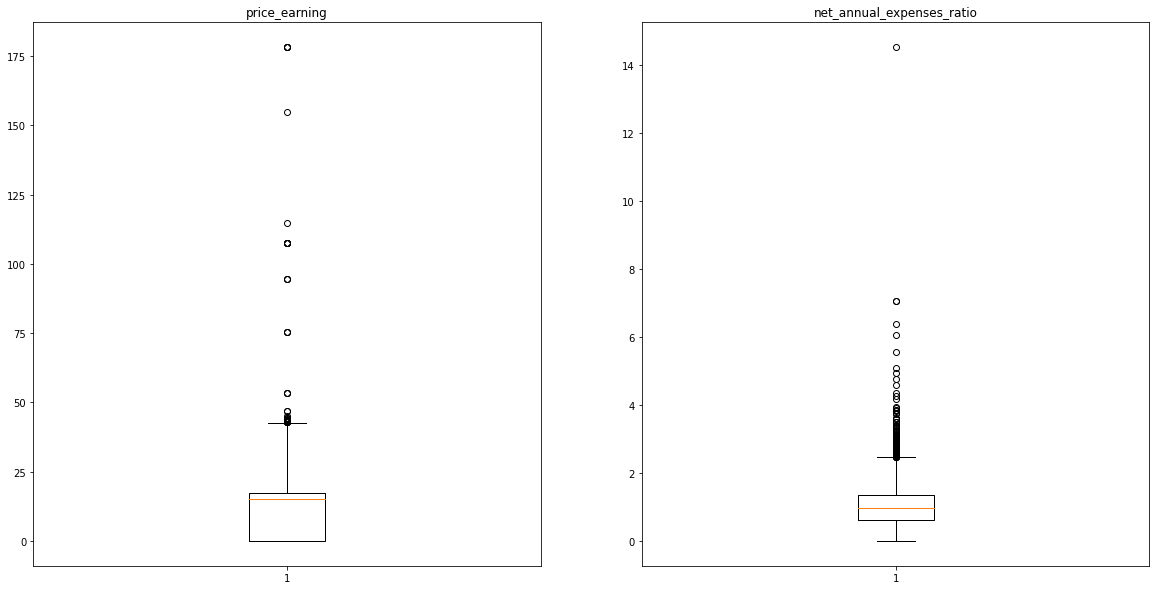

In [15]:
fig, (ax_1, ax_2) = plt.subplots(1,2, figsize=(20,10))

ax_1.boxplot(data['price_earning'])
ax_1.set_title('price_earning')

ax_2.boxplot(data['net_annual_expenses_ratio'])
ax_2.set_title('net_annual_expenses_ratio')

In [16]:
X = data.drop('bonds_aaa',1)
y = data['bonds_aaa']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [18]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [19]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(rmse)

15.729889664218643


In [20]:
# regularization parameters for grid search
ridge_lambdas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60]
lasso_lambdas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]


In [21]:
ridge_model = Ridge()
ridge_grid = GridSearchCV(estimator=ridge_model, param_grid=dict(alpha=ridge_lambdas))
ridge_grid.fit(X_train,y_train)
ridge_pred = ridge_grid.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))

C:\Users\Sagar Mestry\Miniconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.58984e-26): result may not be accurate.
  overwrite_a=True).T
C:\Users\Sagar Mestry\Miniconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.39801e-26): result may not be accurate.
  overwrite_a=True).T
C:\Users\Sagar Mestry\Miniconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.41106e-26): result may not be accurate.
  overwrite_a=True).T
C:\Users\Sagar Mestry\Miniconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.46119e-26): result may not be accurate.
  overwrite_a=True).T
C:\Users\Sagar Mestry\Miniconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.52476e-26): result may not be accurate.
  overwrite_a=True).T
C:\Users\Sagar Mestr

C:\Users\Sagar Mestry\Miniconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.58389e-24): result may not be accurate.
  overwrite_a=True).T
C:\Users\Sagar Mestry\Miniconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.3578e-24): result may not be accurate.
  overwrite_a=True).T
C:\Users\Sagar Mestry\Miniconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.78274e-24): result may not be accurate.
  overwrite_a=True).T
C:\Users\Sagar Mestry\Miniconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.19885e-23): result may not be accurate.
  overwrite_a=True).T
C:\Users\Sagar Mestry\Miniconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.14787e-23): result may not be accurate.
  overwrite_a=True).T
C:\Users\Sagar Mestry

In [22]:
ridge_rmse

15.716203398176287

In [23]:
lasso_model = Lasso()
lasso_grid = GridSearchCV(estimator=lasso_model, param_grid=dict(alpha=lasso_lambdas))
lasso_grid.fit(X_train,y_train)
lasso_pred = lasso_grid.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
lasso_rmse

C:\Users\Sagar Mestry\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 808288.0119996368, tolerance: 376.31566221139906
  positive)
C:\Users\Sagar Mestry\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781070.6820941415, tolerance: 367.3503798249355
  positive)
C:\Users\Sagar Mestry\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 789512.5622000187, tolerance: 373.43127522030227
  positive)
C:\Users\Sagar Mestry\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase t

15.719153628852963

In [24]:
lasso_rmse

15.719153628852963